# **EDA**

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import cv2
import os
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기

In [3]:
# 상의
path_0 = 'path' 
# 아웃터
path_1 = 'path' 
# 바지
path_2 ='path'
# 원피스
path_3 = 'path'
# 스커트
path_4 ='path'
# 신발
path_5 ='path'
# 쥬얼리
path_6 ='path'
# 가방
path_7 ='path'
# 모자
path_8 ='path'
# 안경
path_9 ='path'


In [4]:
musinsa_top = [file for file in os.listdir(path_0) if not file.startswith('c')]
musinsa_outer = [file for file in os.listdir(path_1) if not file.startswith('c')]
musinsa_pants = [file for file in os.listdir(path_2) if not file.startswith('c')]
musinsa_onepiece = [file for file in os.listdir(path_3) if not file.startswith('c')]
musinsa_skirt = [file for file in os.listdir(path_4) if not file.startswith('c')]
musinsa_shoes = [file for file in os.listdir(path_5) if not file.startswith('c')]
musinsa_jewelry = [file for file in os.listdir(path_6) if not file.startswith('c')]
musinsa_bag = [file for file in os.listdir(path_7) if not file.startswith('c')]
musinsa_headwear = [file for file in os.listdir(path_8) if not file.startswith('c')]
musinsa_eyewear = [file for file in os.listdir(path_9) if not file.startswith('c')]

In [5]:
cm_top = [file for file in os.listdir(path_0) if file.startswith('c')]
cm_outer = [file for file in os.listdir(path_1) if file.startswith('c')]
cm_pants = [file for file in os.listdir(path_2) if file.startswith('c')]
cm_onepiece = [file for file in os.listdir(path_3) if file.startswith('c')]
cm_skirt = [file for file in os.listdir(path_4) if file.startswith('c')]
cm_shoes = [file for file in os.listdir(path_5) if file.startswith('c')]
cm_jewelry = [file for file in os.listdir(path_6) if file.startswith('c')]
cm_bag = [file for file in os.listdir(path_7) if file.startswith('c')]
cm_headwear = [file for file in os.listdir(path_8) if file.startswith('c')]
cm_eyewear = [file for file in os.listdir(path_9) if file.startswith('c')]

In [6]:
def wrongdf(filelist):
    first = []
    second = []
    third = []
    for file in filelist:
        name, _ = os.path.splitext(file)
        split_point = name.split('_')[-1]
        if len(split_point) == 1:
            first.append(int(split_point[0]))
            second.append(4)
            third.append(4)
        elif len(split_point) == 2:
            first.append(int(split_point[0]))
            second.append(int(split_point[1]))
            third.append(4)
        elif len(split_point) == 3:
            first.append(int(split_point[0]))
            second.append(int(split_point[1]))
            third.append(int(split_point[2]))
        
    wrong_dic = {'first' : first , 'second':second, 'third':third}
    wrong_df = pd.DataFrame(wrong_dic)

    return wrong_df

In [7]:
top_df_m = wrongdf(musinsa_top)
outer_df_m = wrongdf(musinsa_outer)
pants_df_m = wrongdf(musinsa_pants)
onepiece_df_m = wrongdf(musinsa_onepiece)
skirt_df_m = wrongdf(musinsa_skirt)
shoes_df_m = wrongdf(musinsa_shoes)
jewelry_df_m = wrongdf(musinsa_jewelry)
bag_df_m = wrongdf(musinsa_bag)
headwear_df_m = wrongdf(musinsa_headwear)
eyewear_df_m = wrongdf(musinsa_eyewear)

In [8]:
def wrongdf(filelist):
    first = []
    second = []
    for file in filelist:
        name, _ = os.path.splitext(file)
        split_point = name.split('_')[-1]
        if len(split_point) == 1:
            first.append(int(split_point[0]))
            second.append(4)

        elif len(split_point) == 2:
            first.append(int(split_point[0]))
            second.append(int(split_point[1]))

    wrong_dic = {'Rank' : first , 'second':second}
    wrong_df = pd.DataFrame(wrong_dic)

    return wrong_df

In [9]:
top_df_cm = wrongdf(cm_top)
outer_df_cm = wrongdf(cm_outer)
pants_df_cm = wrongdf(cm_pants)
onepiece_df_cm = wrongdf(cm_onepiece)
skirt_df_cm = wrongdf(cm_skirt)
shoes_df_cm = wrongdf(cm_shoes)
jewelry_df_cm = wrongdf(cm_jewelry)
bag_df_cm = wrongdf(cm_bag)
headwear_df_cm = wrongdf(cm_headwear)
eyewear_df_cm = wrongdf(cm_eyewear)

In [10]:
musinsa_df = pd.concat([top_df_m, outer_df_m, pants_df_m, onepiece_df_m, skirt_df_m, shoes_df_m, jewelry_df_m, bag_df_m, headwear_df_m, eyewear_df_m])
cm_df = pd.concat([top_df_cm, outer_df_cm, pants_df_cm, onepiece_df_cm, skirt_df_cm, shoes_df_cm, jewelry_df_cm, bag_df_cm, headwear_df_cm, eyewear_df_cm])

In [11]:
color = ['blueviolet','mediumorchid','plum','thistle']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

## 데이터 수집 비율

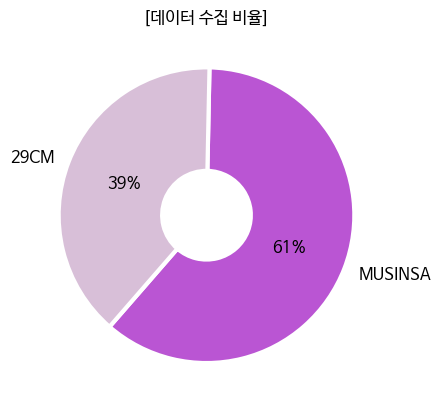

In [12]:
# 데이터 수집 비율
labels = ['MUSINSA', '29CM']
values = [len(musinsa_df), len(cm_df)]

plt.pie(values, labels=labels, autopct='%.0f%%', colors=['mediumorchid','thistle'], wedgeprops=wedgeprops, textprops={'size':12}, startangle=229, counterclock=True)
plt.title('[데이터 수집 비율]')
plt.show()

## 불량 리뷰 유형 분포 : MUSINSA

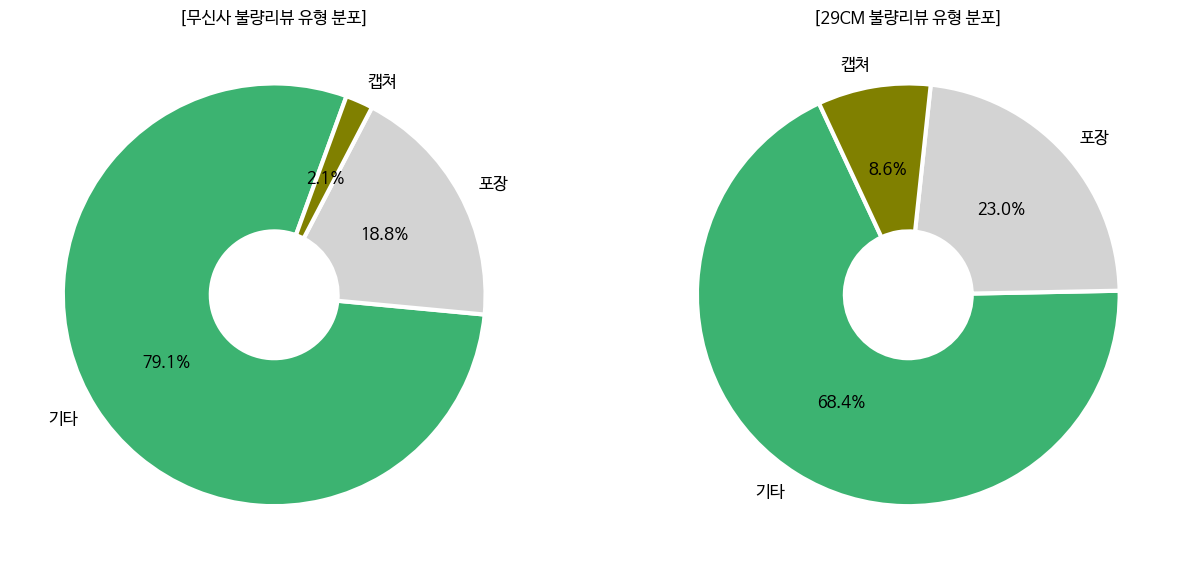

In [13]:
# 무신사 불량 리뷰 유형 분포
labels = ['기타', '포장', '캡쳐']

fig, axes = plt.subplots(1, 2, figsize=(15, 10))  

axes[0].pie(musinsa_df[musinsa_df['second'] == 3]['third'].value_counts(),
            labels=labels, autopct='%.1f%%', colors=['mediumseagreen', 'lightgray', 'olive'], wedgeprops=wedgeprops,
            textprops={'size':12}, startangle=70)
axes[0].set_title('[무신사 불량리뷰 유형 분포]')


axes[1].pie(cm_df[cm_df['Rank'] == 3]['second'].value_counts(),
            labels=labels, autopct='%.1f%%', colors=['mediumseagreen', 'lightgray', 'olive'], wedgeprops=wedgeprops,
            textprops={'size':12}, startangle=115)
axes[1].set_title('[29CM 불량리뷰 유형 분포]')

plt.show()

In [14]:
musinsa_style = musinsa_df[musinsa_df['first'] == 0][['second']].replace(4,0)

In [15]:
musinsa_product = musinsa_df[musinsa_df['first'] == 2][['second']].replace(4,2)

### 리뷰 이미지 분포 : MUSINSA

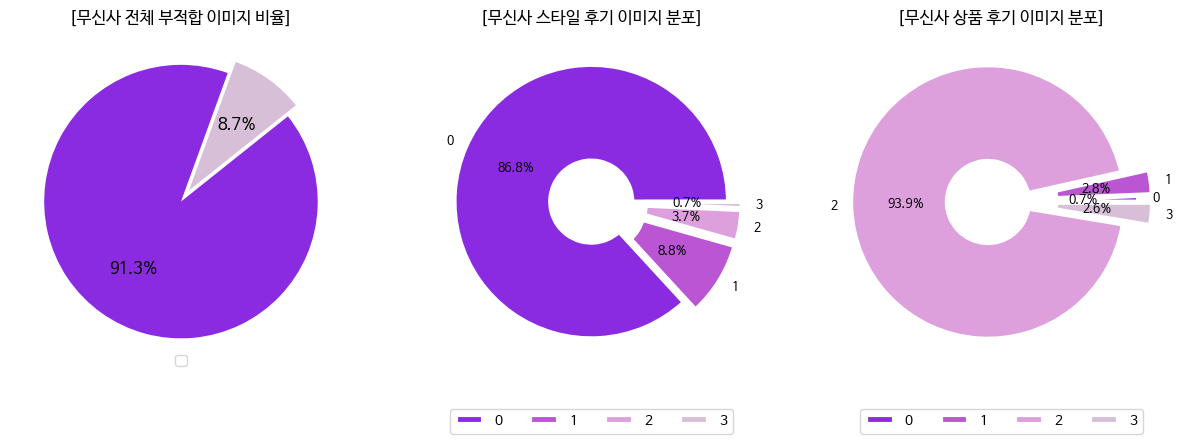

In [16]:
values = [len(musinsa_df), len(musinsa_df[musinsa_df['second'] != 4])]
labels = [0,1,2,3]

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].pie(values, autopct='%.1f%%', colors= ['blueviolet','thistle'], wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 0},
            textprops={'size':12}, startangle=70, explode=[0,0.1])
axes[0].legend(loc='lower center')
axes[0].set_title('[무신사 전체 부적합 이미지 비율]')

axes[1].pie(musinsa_style.value_counts(), autopct='%.1f%%', colors=color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9}, explode=[0,0.1,0.1,0.1])
axes[1].legend(bbox_to_anchor=(0.5, -0.2),loc='lower center', ncol=4)
axes[1].set_title('[무신사 스타일 후기 이미지 분포]')

axes[2].pie(musinsa_product.value_counts(sort=False), autopct='%.1f%%', colors=color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9}, explode=[0,0.1,0.1,0.1])
axes[2].legend(bbox_to_anchor=(0.5, -0.2),loc='lower center', ncol=4)
axes[2].set_title('[무신사 상품 후기 이미지 분포]')

plt.show()


In [17]:
def wrongcount(df):
    wrong_style_df = df[df['first'] == 0]
    half_df = wrong_style_df[wrong_style_df['second'] == 1]
    product_df = wrong_style_df[wrong_style_df['second'] == 2]
    bad_df = wrong_style_df[wrong_style_df['second'] == 3]
    total = len(half_df) + len(product_df) + len(bad_df)

    half_ratio = int((len(half_df) / total) *100)
    #product_ratio = len(half_df)
    product_ratio = int((len(product_df) / total) *100)
    bad_ratio = int((len(bad_df) / total) *100)

    return half_ratio, product_ratio, bad_ratio

In [18]:
upp_ratio_1, upp_ratio_2, upp_ratio_3 = wrongcount(top_df_m)
out_ratio_1, out_ratio_2, out_ratio_3 = wrongcount(outer_df_m)
pan_ratio_1, pan_ratio_2, pan_ratio_3 = wrongcount(pants_df_m)
one_ratio_1, one_ratio_2, one_ratio_3 = wrongcount(onepiece_df_m)
skr_ratio_1, skr_ratio_2, skr_ratio_3 = wrongcount(skirt_df_m)
sho_ratio_1, sho_ratio_2, sho_ratio_3 = wrongcount(shoes_df_m)
jew_ratio_1, jew_ratio_2, jew_ratio_3 = wrongcount(jewelry_df_m)
bag_ratio_1, bag_ratio_2, bag_ratio_3 = wrongcount(bag_df_m)
hat_ratio_1, hat_ratio_2, hat_ratio_3 = wrongcount(headwear_df_m)
glas_ratio_1, glas_ratio_2, glas_ratio_3 = wrongcount(eyewear_df_m)

In [19]:
half_ratio = [upp_ratio_1, out_ratio_1, pan_ratio_1, one_ratio_1, skr_ratio_1, sho_ratio_1, jew_ratio_1, bag_ratio_1, hat_ratio_1, glas_ratio_1]
product_ratio = [upp_ratio_2, out_ratio_2, pan_ratio_2, one_ratio_2, skr_ratio_2, sho_ratio_2, jew_ratio_2, bag_ratio_2, hat_ratio_2, glas_ratio_2]
bad_ratio = [upp_ratio_3, out_ratio_3, pan_ratio_3, one_ratio_3, skr_ratio_3, sho_ratio_3, jew_ratio_3, bag_ratio_3, hat_ratio_3, glas_ratio_3]

wrong_dict = {'1(신체일부)':half_ratio, '2(상품)':product_ratio, '3(기타)':bad_ratio}
df = pd.DataFrame(wrong_dict, index= ['top','outer','pants','onepiece','skirt','shoes','jewelry','bag','headwear','eyewear'], dtype = int)


### 부적합 스타일 후기 유형 : MUSINSA

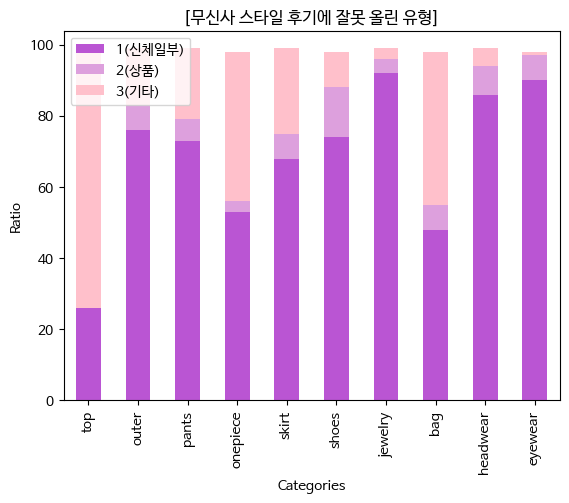

In [20]:
# 무신사 스타일 후기에 잘못 올린 유형
df.plot(kind='bar', stacked=True, color = ['mediumorchid', 'plum', 'pink'])
plt.xlabel('Categories')
plt.ylabel('Ratio')
plt.title('[무신사 스타일 후기에 잘못 올린 유형]')
plt.legend(loc='upper left')
plt.show()

## 등급별 비율 : 29CM

Text(0.5, 1.0, '전체')

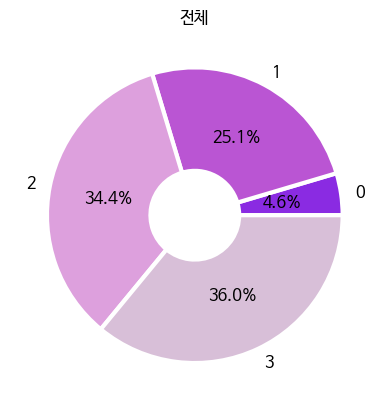

In [21]:
labels = [0,1,2,3]

plt.pie(cm_df[['Rank']].value_counts(sort=False), labels=labels, autopct='%.1f%%', colors = color, wedgeprops=wedgeprops,
            textprops={'size':12},)
plt.title('전체')

### 주요항목 등급별 비율 : 29CM

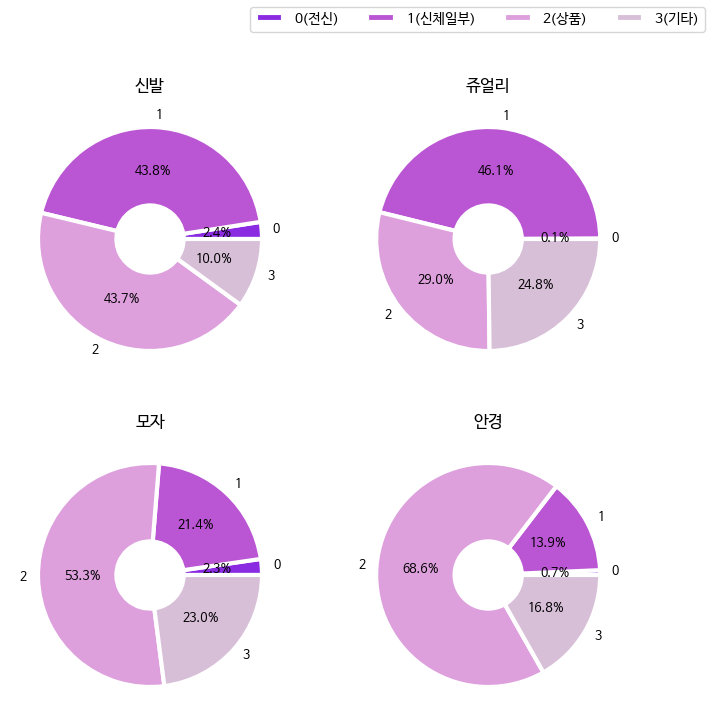

In [22]:
labels = [0,1,2,3]
legend_label = ['0(전신)', '1(신체일부)', '2(상품)', '3(기타)']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0,0].pie(shoes_df_cm[['Rank']].value_counts(sort=False), autopct='%.1f%%', colors= color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9},)
axes[0,0].set_title('신발')

axes[0,1].pie(jewelry_df_cm[['Rank']].value_counts(sort=False), autopct='%.1f%%', colors=color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9},)
axes[0,1].set_title('쥬얼리')

axes[1,0].pie(headwear_df_cm[['Rank']].value_counts(sort=False), autopct='%.1f%%', colors=color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9},)
axes[1,0].set_title('모자')

axes[1,1].pie(eyewear_df_cm[['Rank']].value_counts(sort=False), autopct='%.1f%%', colors=color, wedgeprops=wedgeprops,
            labels=labels, textprops={'size':9},)
axes[1,1].set_title('안경')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, legend_label, loc='upper right', ncol=4)

plt.show()

In [23]:
################ 결과 EDA #####################

# **결과 EDA**

## 결과불러오기

### 결과불러오기 : 카테고리 분류기 결과

In [24]:
df_0 = pd.read_csv('path')
df_1 = pd.read_csv('path')
df_2 = pd.read_csv('path')
df_3 = pd.read_csv('path')
df_4 = pd.read_csv('path')
df_5 = pd.read_csv('path')
df_6 = pd.read_csv('path')
df_7 = pd.read_csv('path')
df_8 = pd.read_csv('path')
df_9 = pd.read_csv('path')


In [25]:
count_0 = len(df_0)
count_1 = len(df_1)
count_2 = len(df_2)
count_3 = len(df_3)
count_4 = len(df_4)
count_5 = len(df_5)
count_6 = len(df_6)
count_7 = len(df_7)
count_8 = len(df_8)
count_9 = len(df_9)

In [26]:
def rank3(df, total_count):
    last_rank = max(df['true_label'].unique())
    correct_df = df[(df['pred_label'] == df['true_label'])& (df['true_label'] == int(last_rank))]
    total_df = df[df['true_label'] == int(last_rank)]
    result = round(((len(correct_df) / len(total_df))), 4)

    return result

In [27]:
rank3_list = []
result_0 = rank3(df_0, count_0)
result_1 = rank3(df_1, count_1)
result_2 = rank3(df_2, count_2)
result_3 = rank3(df_3, count_3)
result_4 = rank3(df_4, count_4)
result_5 = rank3(df_5, count_5)
result_6 = rank3(df_6, count_6)
result_7 = rank3(df_7, count_7)
result_8 = rank3(df_8, count_8)
result_9 = rank3(df_9, count_9)

rank3_performace = [result_0, result_1, result_2, result_3, result_4, result_5, result_6, result_7, result_8, result_9]

In [28]:
def realrank(df):
    corr_0 = df[(df['true_rank'] == df['pred_rank']) & (df['true_rank'] == 0)]
    corr_1 = df[(df['true_rank'] == df['pred_rank']) & (df['true_rank'] == 1)]
    corr_2 = df[(df['true_rank'] == df['pred_rank']) & (df['true_rank'] == 2)]

    return len(corr_0), len(corr_1), len(corr_2)

In [29]:
def rankcount(df):
    rank_0 = len(df[df['rank'] == 0])
    rank_1 = len(df[df['rank'] == 1])
    rank_2 = len(df[df['rank'] == 2])

    return rank_0 , rank_1, rank_2

In [30]:
rank_0_0, rank_0_1, rank_0_2 = rankcount(df_0)
rank_1_0, rank_1_1, rank_1_2 = rankcount(df_1)
rank_2_0, rank_2_1, rank_2_2 = rankcount(df_2)
rank_3_0, rank_3_1, rank_3_2 = rankcount(df_3)
rank_4_0, rank_4_1, rank_4_2 = rankcount(df_4)
rank_5_0, rank_5_1, rank_5_2 = rankcount(df_5)
rank_6_0, rank_6_1, rank_6_2 = rankcount(df_6)
rank_7_0, rank_7_1, rank_7_2 = rankcount(df_7)
rank_8_0, rank_8_1, rank_8_2 = rankcount(df_8)
rank_9_0, rank_9_1, rank_9_2 = rankcount(df_9)

### 결과불러오기 : 등급 분류기 결과

In [31]:
df_0_rank = pd.read_csv('path')
df_1_rank = pd.read_csv('path')
df_2_rank = pd.read_csv('path')
df_3_rank = pd.read_csv('path')
df_4_rank = pd.read_csv('path')
df_5_rank = pd.read_csv('path')
df_6_rank = pd.read_csv('path')
df_7_rank = pd.read_csv('path')
df_8_rank = pd.read_csv('path')
df_9_rank = pd.read_csv('path')

In [32]:
df_2_rank.rename(columns={'rank':'true_rank'},inplace=True)
df_5_rank.rename(columns={'real_rank':'true_rank'},inplace=True)
df_8_rank.rename(columns={'rank':'true_rank'},inplace=True)
df_9_rank.rename(columns={'real_rank':'true_rank'},inplace=True)

In [33]:
real_0_0, real_0_1, real_0_2 = realrank(df_0_rank)
real_1_0, real_1_1, real_1_2 = realrank(df_1_rank)
real_2_0, real_2_1, real_2_2 = realrank(df_2_rank)
real_3_0, real_3_1, real_3_2 = realrank(df_3_rank)
real_4_0, real_4_1, real_4_2 = realrank(df_4_rank)
real_5_0, real_5_1, real_5_2 = realrank(df_5_rank)
real_6_0, real_6_1, real_6_2 = realrank(df_6_rank)
real_7_0, real_7_1, real_7_2 = realrank(df_7_rank)
real_8_0, real_8_1, real_8_2 = realrank(df_8_rank)
real_9_0, real_9_1, real_9_2 = realrank(df_9_rank)

In [34]:
performance_0 = [round(real_0_0/rank_0_0, 4), round(real_0_1/rank_0_1, 4), round(real_0_2/rank_0_2, 4), rank3_performace[0]]
performance_1 = [round(real_1_0/rank_1_0, 4), round(real_1_1/rank_1_1, 4), round(real_1_2/rank_1_2, 4), rank3_performace[1]]
performance_2 = [round(real_2_0/rank_2_0, 4), round(real_2_1/rank_2_1, 4), round(real_2_2/rank_2_2, 4), rank3_performace[2]]
performance_3 = [round(real_3_0/rank_3_0, 4), round(real_3_1/rank_3_1, 4), round(real_3_2/rank_3_2, 4), rank3_performace[3]]
performance_4 = [round(real_4_0/rank_4_0, 4), round(real_4_1/rank_4_1, 4), round(real_4_2/rank_4_2, 4), rank3_performace[4]]
performance_5 = [round(real_5_0/rank_5_0, 4), round(real_5_1/rank_5_1, 4), round(real_5_2/rank_5_2, 4), rank3_performace[5]]
performance_6 = [round(real_6_0/rank_6_0, 4), round(real_6_1/rank_6_1, 4), round(real_6_2/rank_6_2, 4), rank3_performace[6]]
performance_7 = [round(real_7_0/rank_7_0, 4), round(real_7_1/rank_7_1, 4), round(real_7_2/rank_7_2, 4), rank3_performace[7]]
performance_8 = [round(real_8_0/rank_8_0, 4), round(real_8_1/rank_8_1, 4), round(real_8_2/rank_8_2, 4), rank3_performace[8]]
performance_9 = [round(real_9_0/rank_9_0, 4), round(real_9_1/rank_9_1, 4), round(real_9_2/rank_9_2, 4), rank3_performace[9]]


## 소분류별 등급분류기 성능표

In [35]:
### 소분류별 등급분류기 성능표 ###
data = {
    'top': performance_0,
    'outer': performance_1,
    'pants': performance_2,
    'onepiece': performance_3,
    'skirt': performance_4,
    'shoes': performance_5,
    'jewelry': performance_6,
    'bag' : performance_7,
    'headwear': performance_8,
    'eyewear': performance_9
}
df = pd.DataFrame(data)

df['avg'] = df.mean(axis=1)

df

,top,outer,pants,onepiece,skirt,shoes,jewelry,bag,headwear,eyewear,avg
0,0.8144,0.65,0.89,0.9074,0.9615,0.51,0.3065,0.5682,0.4667,0.40,0.64747
1,0.7475,0.81,0.70,0.6429,0.8958,0.80,0.8440,0.5435,0.6933,0.94,0.76170
2,0.9400,0.65,0.90,0.9268,1.0000,0.85,0.6000,0.7525,0.6933,0.96,0.82726
3,0.9231,0.93,0.98,0.8889,0.9000,0.66,0.8478,0.8319,0.9333,0.72,0.86150


## Wrong Confusion Matrix 그리기

In [36]:
def draw_confusion_matrix(labels, true, pred, category):
    cm = confusion_matrix(true, pred)
    plt.imshow(cm, cmap=plt.cm.Purples)
    plt.colorbar()
    indexes = np.arange(len(labels))
    for i in indexes:
      for j in indexes:
        plt.text(j,i,cm[i,j])
    plt.xticks(indexes, labels,)
    plt.xlabel('예측')
    plt.yticks(indexes, labels,)
    plt.ylabel('실제')
    plt.title(f'Wrong Confusion Matrix : {category}')
    plt.show()

In [37]:
df_4_wrong = df_4[df_4['pred_label'] != df_4['true_label']]

In [38]:
other_label = {0:'mini', 1:'long', 2:'else'}
rank_label = {0:'whole', 1:'half', 2:'product', 3:'else'}

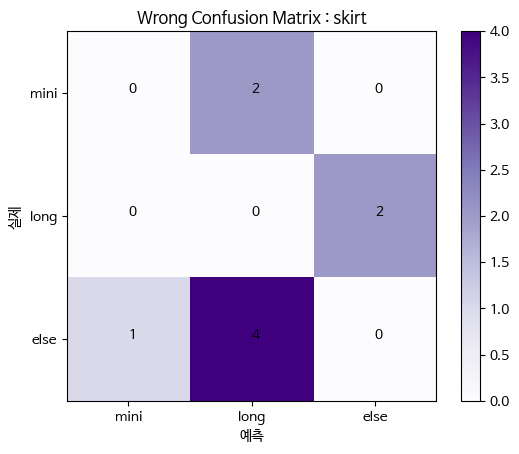

In [39]:
draw_confusion_matrix(other_label.values(), true=np.array(df_4_wrong['true_label']), pred=np.array(df_4_wrong['pred_label']), category ='skirt')

## 틀린 데이터 보기

In [43]:
def show_image(df, labels, figsize=(10,35)):
    id_path = df['path'].tolist()
    preds = df['pred_label'].tolist()
    true = df['true_label'].tolist()

    row = len(id_path) // 5
    figure, ax = plt.subplots(nrows=(row+1), ncols=5, figsize=figsize)

    for i, (path, pred, true_label) in enumerate(zip(id_path, preds, true)):
        try:
            image = cv2.imread(path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except:
            print(i)

        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(f'True:{labels[true_label]}\nPred:{labels[pred]}')
        ax.ravel()[i].set_axis_off()

    plt.tight_layout()
    plt.show()

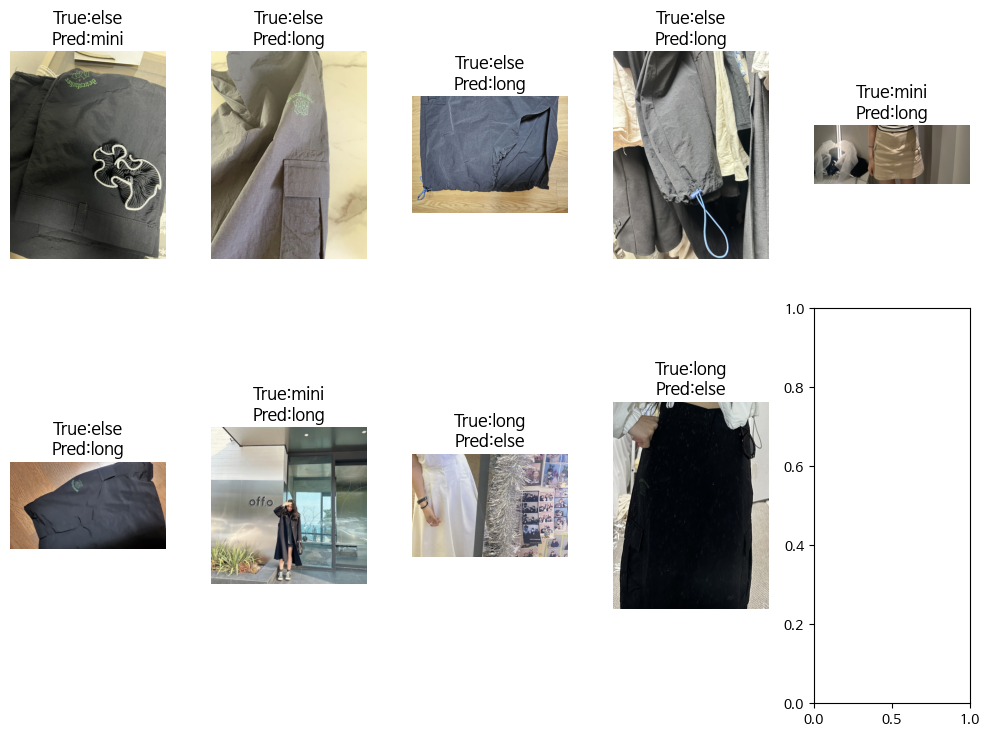

In [44]:
show_image(df_4_wrong, other_label, figsize=(10,8))

## 정량적 기대효과 : MUSINSA

In [45]:
rank_1_count = [len(top_df_m[(top_df_m['first'] == 0) & (top_df_m['second'] == 1)]) ,len(outer_df_m[(outer_df_m['first'] == 0) & (outer_df_m['second'] == 1)]) ,len(pants_df_m[(pants_df_m['first'] == 0) & (pants_df_m['second'] == 1)]) ,len(onepiece_df_m[(onepiece_df_m['first'] == 0) & (onepiece_df_m['second'] == 1)]) ,len(skirt_df_m[(skirt_df_m['first'] == 0) & (skirt_df_m['second'] == 1)]) ,len(shoes_df_m[(shoes_df_m['first'] == 0) & (shoes_df_m['second'] == 1)]) ,len(jewelry_df_m[(jewelry_df_m['first'] == 0) & (jewelry_df_m['second'] == 1)]) ,len(bag_df_m[(bag_df_m['first'] == 0) & (bag_df_m['second'] == 1)]) ,len(headwear_df_m[(headwear_df_m['first'] == 0) & (headwear_df_m['second'] == 1)]) ,len(eyewear_df_m[(eyewear_df_m['first'] == 0) & (eyewear_df_m['second'] == 1)])]

row_1_list = df.loc[1].tolist()[:-1]
rank_1_performace = row_1_list

musinsa_1_wrong = [int(y- (x * y)) for x, y in zip(rank_1_performace, rank_1_count)]

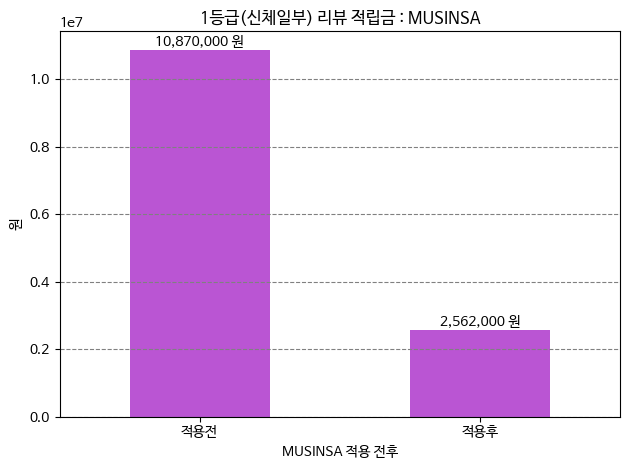

In [46]:
before_ratio = int(sum(rank_1_count) * 2000)
after_ratio = int(sum(musinsa_1_wrong) * 2000)

good = [before_ratio, after_ratio]
df = pd.DataFrame(good, index=['적용전', '적용후'])

ax = df.plot(kind='bar', color='mediumorchid', legend=None)
plt.xlabel('MUSINSA 적용 전후')
plt.xticks(rotation=360)
plt.ylabel('원')
plt.grid(True, axis='y', color='gray', linestyle='--')
plt.title('1등급(신체일부) 리뷰 적립금 : MUSINSA')

for i, v in enumerate(good):
    ax.text(i, v, f'{v:,} 원', color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [47]:
rank3_count = [len(top_df_cm[top_df_cm['Rank'] == 3]) ,len(outer_df_cm[outer_df_cm['Rank'] == 3]) ,len(pants_df_cm[pants_df_cm['Rank'] == 3]) ,len(onepiece_df_cm[onepiece_df_cm['Rank'] == 3]) ,len(skirt_df_cm[skirt_df_cm['Rank'] == 3]) ,len(shoes_df_cm[shoes_df_cm['Rank'] == 3]) ,len(jewelry_df_cm[jewelry_df_cm['Rank'] == 3]) ,len(bag_df_cm[bag_df_cm['Rank'] == 3]) ,len(headwear_df_cm[headwear_df_cm['Rank'] == 3]) ,len(eyewear_df_cm[eyewear_df_cm['Rank'] == 3])]

In [48]:
rank3_result = [int(y- (x * y)) for x, y in zip(rank3_performace, rank3_count)]

## 정량적 기대효과 : 29CM ###

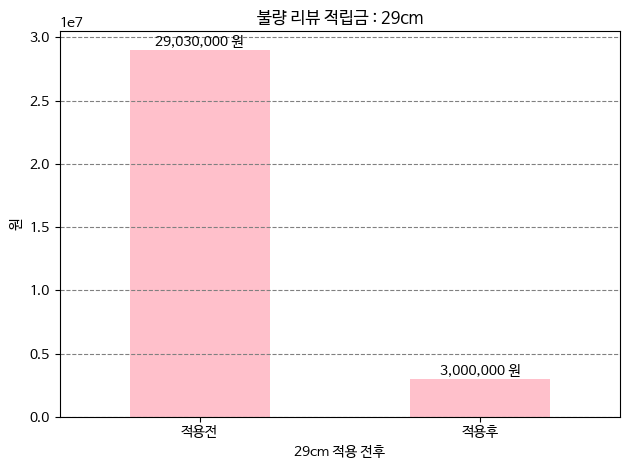

In [49]:
### 불량 리뷰 적립금 : 29CM ###
before_ratio = int((sum(rank3_count) * 1000))
after_ratio = int((sum(rank3_result) * 1000))

good = [before_ratio, after_ratio]
df = pd.DataFrame(good, index=['적용전', '적용후'])

ax = df.plot(kind='bar', color='pink', legend=None)
plt.xlabel('29cm 적용 전후')
plt.xticks(rotation=360)
plt.ylabel('원')
plt.grid(True, axis='y', color='gray', linestyle='--')
plt.title('불량 리뷰 적립금 : 29cm')

for i, v in enumerate(good):
    ax.text(i, v, f'{v:,} 원', color='black', ha='center', va='bottom')

plt.tight_layout() 

plt.show()